
![ Data Analysis](loan_prediction.png)

# Objective : Loan Prediction

# Exploratory Data Analysis (EDA) - Python

# Insights - Patterns

# Classification (Using the ML)


# 1. Load Python Modules

In [202]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

from scipy import stats

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# 2. Read the Dataset from CSV file  - Using Pandas

In [203]:
file_path=r"loan_train_dataset.csv"
loan_df=pd.read_csv(file_path)
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# 3. Basic Inspection on given dataset

In [204]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())

basic_inspection_dataset(loan_df)

top 5 rows - using head
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           

### 3.1 Non-Significant columns - we need to drop here.

In [205]:
#drop - sensitive - non imp columns for data analysis 
print(loan_df["Loan_ID"].nunique())
loan_df.drop("Loan_ID",axis=1,inplace=True)
print(loan_df.columns)

614
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [206]:
# convertinh Credit_History column as categorical column - based on the previous experiments
loan_df["Credit_History"]=loan_df["Credit_History"].map(lambda x: 'N' if x==0 else 'Y')

# 4. Handling Missing Values - Cat - Variables

In [207]:
def print_cat_values(cat_var):
    print("We are studying about varailbe/column/feature :", cat_var)
    print("categories:",loan_df[cat_var].unique())
    print("num of categories:",loan_df[cat_var].nunique())
    print("Value-counts:", loan_df[cat_var].value_counts())  

In [208]:
cat_vars = loan_df.select_dtypes(include="object").columns
print(cat_vars) ### selct the missing values - cat -vars
cat_vars = ['Gender', 'Married', 'Dependents', 'Self_Employed','Credit_History']

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [209]:
for var in cat_vars:
    print_cat_values(var)
    print("=========================================")
    print()

We are studying about varailbe/column/feature : Gender
categories: ['Male' 'Female' nan]
num of categories: 2
Value-counts: Gender
Male      489
Female    112
Name: count, dtype: int64

We are studying about varailbe/column/feature : Married
categories: ['No' 'Yes' nan]
num of categories: 2
Value-counts: Married
Yes    398
No     213
Name: count, dtype: int64

We are studying about varailbe/column/feature : Dependents
categories: ['0' '1' '2' '3+' nan]
num of categories: 4
Value-counts: Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

We are studying about varailbe/column/feature : Self_Employed
categories: ['No' 'Yes' nan]
num of categories: 2
Value-counts: Self_Employed
No     500
Yes     82
Name: count, dtype: int64

We are studying about varailbe/column/feature : Credit_History
categories: ['Y' 'N']
num of categories: 2
Value-counts: Credit_History
Y    525
N     89
Name: count, dtype: int64



In [210]:
for var in cat_vars:
    mode = loan_df[var].mode()[0]
    #print(mode)

    # fill the missing value with mode
    loan_df[var].fillna(mode,inplace=True)
    
# check for missing values - for confirmation
loan_df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [211]:
# in dependents columns - replacing/filling with 3+ with 3
loan_df["Dependents"] = loan_df["Dependents"].map(lambda x : '3' if x=='3+' else x)

In [212]:
loan_df["Dependents"].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [213]:
loan_df.dtypes


Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

# 5. Categorical- UniVariable - Analysis -Using Pipeline

In [214]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # get cat columns 
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

Gender frequency table
+---+--------+-----------+
|   | Class  | Frequency |
+---+--------+-----------+
| 0 |  Male  |    502    |
| 1 | Female |    112    |
+---+--------+-----------+
Gender Relative frequency table
+---+--------+-----------+----------------------+
|   | Class  | Frequency | Relative Frequency % |
+---+--------+-----------+----------------------+
| 0 |  Male  |    502    |        81.76         |
| 1 | Female |    112    |        18.24         |
+---+--------+-----------+----------------------+


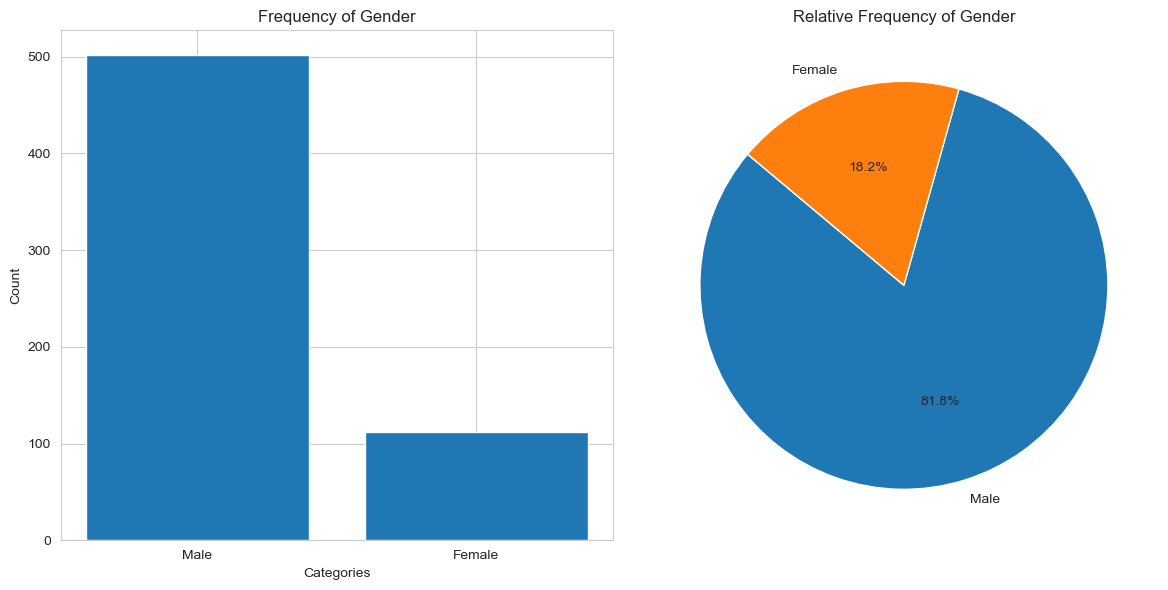

Married frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  Yes  |    401    |
| 1 |  No   |    213    |
+---+-------+-----------+
Married Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  Yes  |    401    |        65.31         |
| 1 |  No   |    213    |        34.69         |
+---+-------+-----------+----------------------+


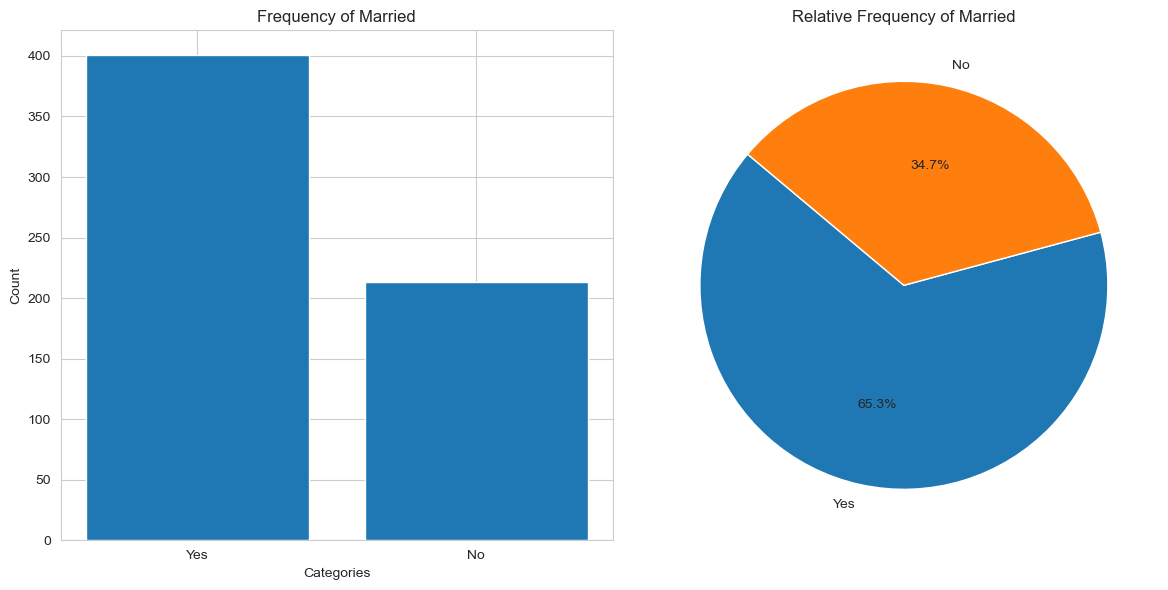

Dependents frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   0   |    360    |
| 1 |   1   |    102    |
| 2 |   2   |    101    |
| 3 |   3   |    51     |
+---+-------+-----------+
Dependents Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   0   |    360    |        58.63         |
| 1 |   1   |    102    |        16.61         |
| 2 |   2   |    101    |        16.45         |
| 3 |   3   |    51     |         8.31         |
+---+-------+-----------+----------------------+


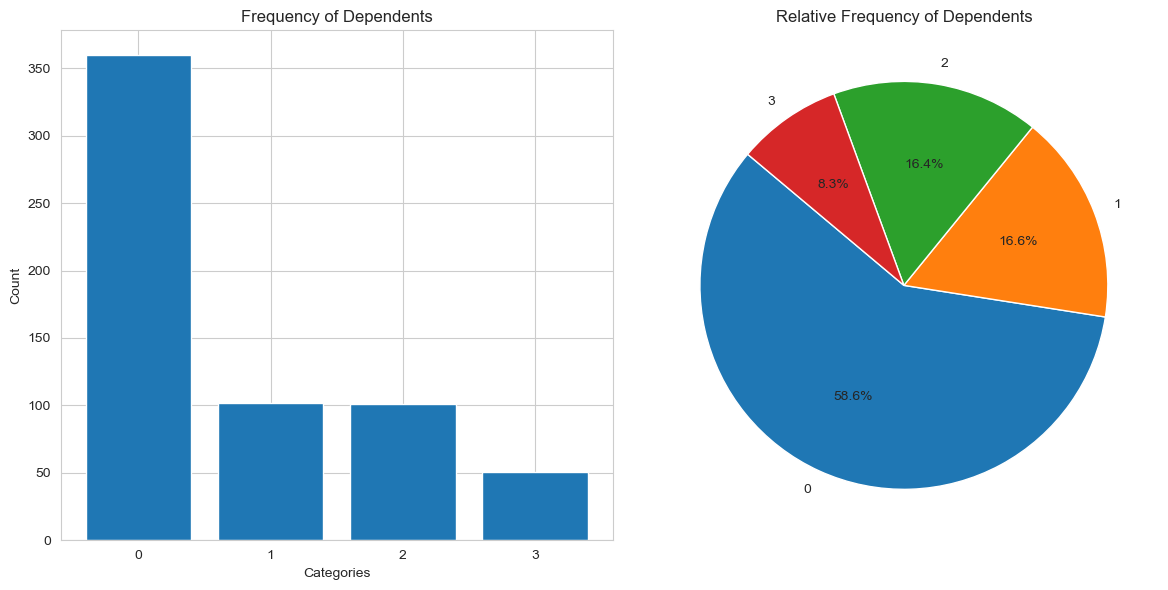

Education frequency table
+---+--------------+-----------+
|   |    Class     | Frequency |
+---+--------------+-----------+
| 0 |   Graduate   |    480    |
| 1 | Not Graduate |    134    |
+---+--------------+-----------+
Education Relative frequency table
+---+--------------+-----------+----------------------+
|   |    Class     | Frequency | Relative Frequency % |
+---+--------------+-----------+----------------------+
| 0 |   Graduate   |    480    |        78.18         |
| 1 | Not Graduate |    134    |        21.82         |
+---+--------------+-----------+----------------------+


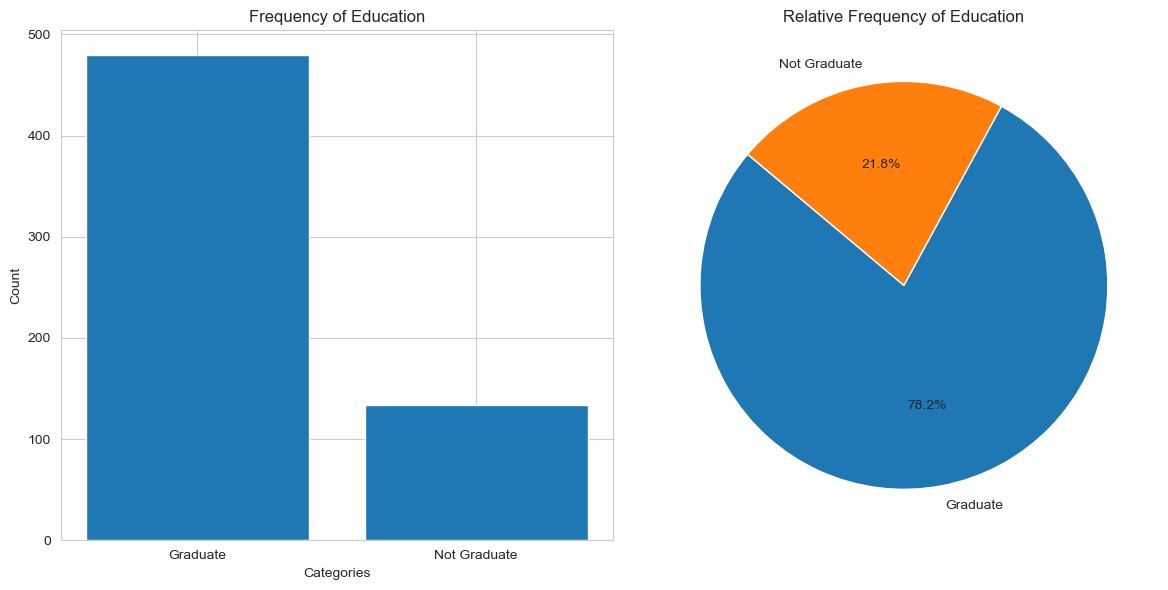

Self_Employed frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |    532    |
| 1 |  Yes  |    82     |
+---+-------+-----------+
Self_Employed Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |    532    |        86.64         |
| 1 |  Yes  |    82     |        13.36         |
+---+-------+-----------+----------------------+


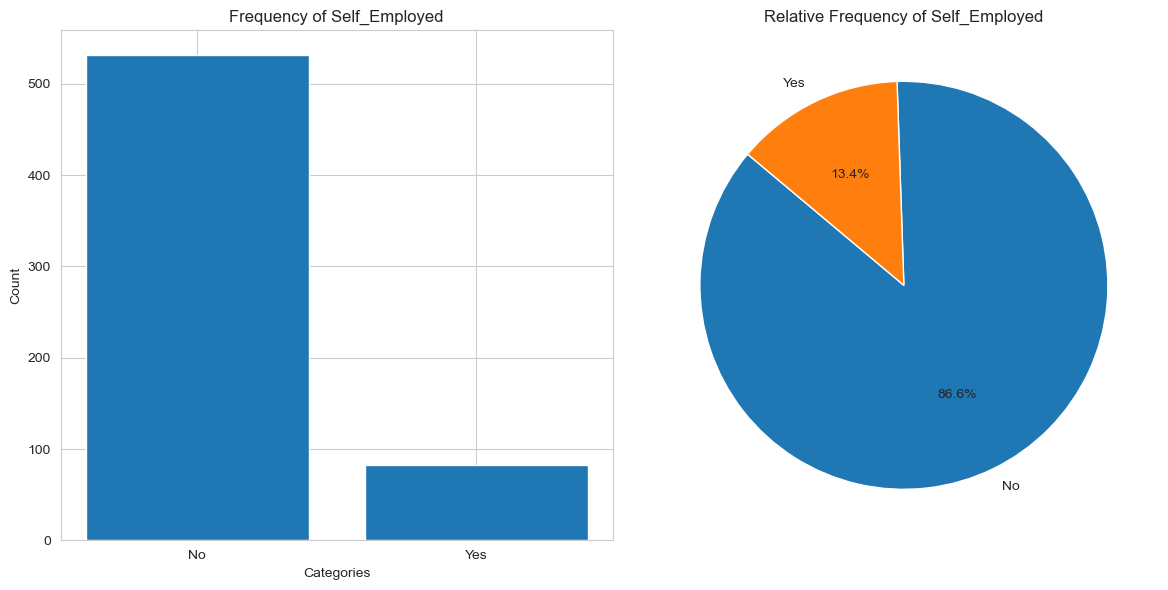

Credit_History frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   Y   |    525    |
| 1 |   N   |    89     |
+---+-------+-----------+
Credit_History Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   Y   |    525    |         85.5         |
| 1 |   N   |    89     |         14.5         |
+---+-------+-----------+----------------------+


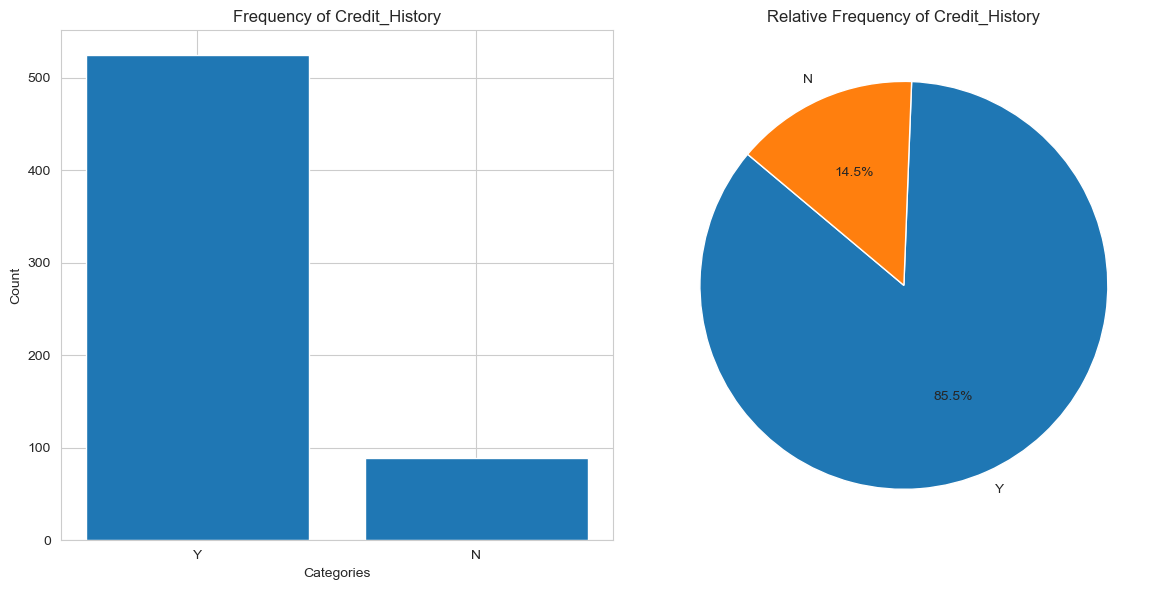

Property_Area frequency table
+---+-----------+-----------+
|   |   Class   | Frequency |
+---+-----------+-----------+
| 0 | Semiurban |    233    |
| 1 |   Urban   |    202    |
| 2 |   Rural   |    179    |
+---+-----------+-----------+
Property_Area Relative frequency table
+---+-----------+-----------+----------------------+
|   |   Class   | Frequency | Relative Frequency % |
+---+-----------+-----------+----------------------+
| 0 | Semiurban |    233    |        37.95         |
| 1 |   Urban   |    202    |         32.9         |
| 2 |   Rural   |    179    |        29.15         |
+---+-----------+-----------+----------------------+


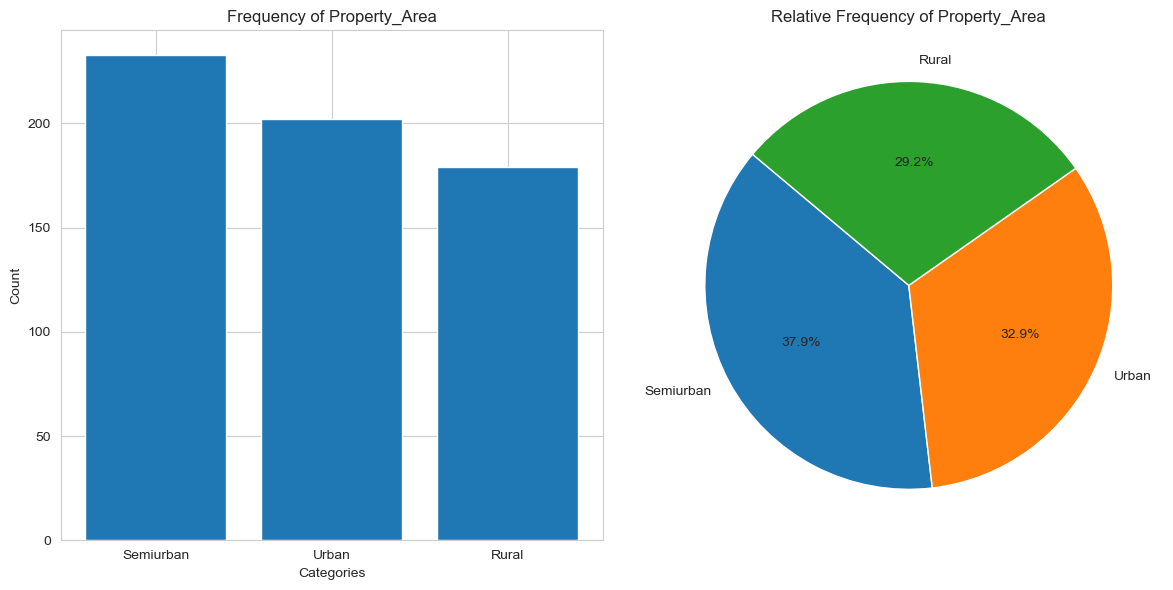

Loan_Status frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   Y   |    422    |
| 1 |   N   |    192    |
+---+-------+-----------+
Loan_Status Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   Y   |    422    |        68.73         |
| 1 |   N   |    192    |        31.27         |
+---+-------+-----------+----------------------+


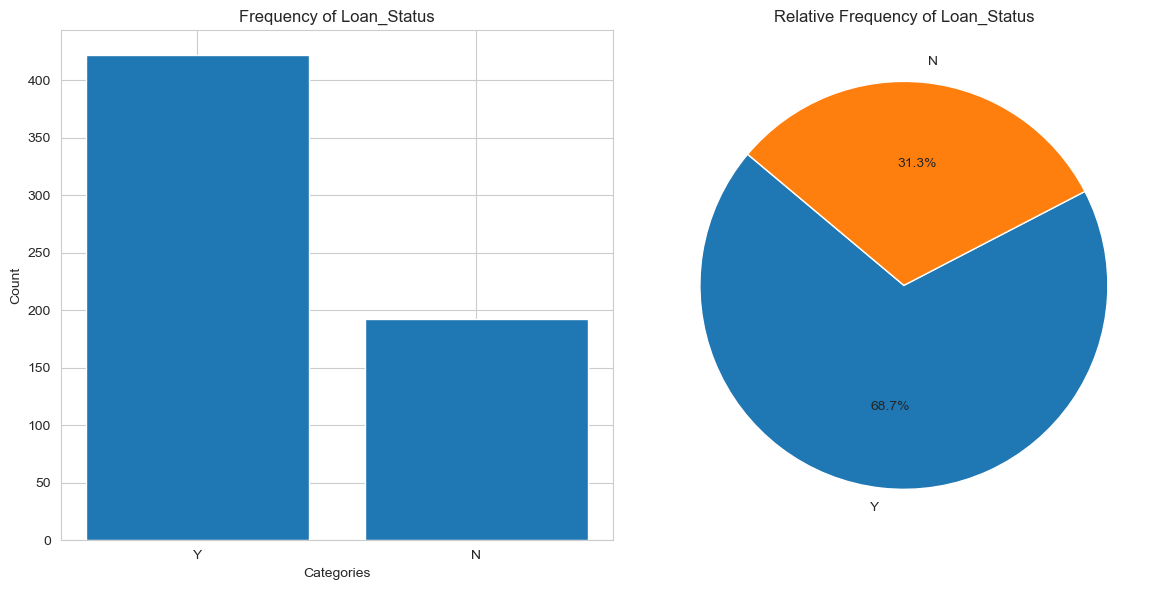

In [215]:
pipeline_cat_var = Pipeline([
    ('cat_univaraite_analysis', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(loan_df)

# 6. Handling Missing Values in Numerical Columns

In [216]:
loan_df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [217]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [218]:
global_loan_amount_term_mode = loan_df['Loan_Amount_Term'].mode()[0]
loan_df['Loan_Amount_Term'].fillna(global_loan_amount_term_mode,inplace=True)

In [219]:
global_loan_amount_mean = 0
for var in ["LoanAmount"]:
    mean = loan_df[var].mean()
    global_loan_amount_mean = mean
    #print(median)

    # fill the missing value with mode
    loan_df[var].fillna(global_loan_amount_mean,inplace=True)
    
# check for missing values - for confirmation
loan_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 7. Numerical - UniVariable - Analysis - Using -Pipeline

In [220]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # getting num cols
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
            var_min = int(df[con_var].min())
            var_max = int(df[con_var].max())
            
            step = int(round((var_max-var_min)/10))
            bins = [x for x in range(var_min,var_max+1,step)]
            print(f"{con_var} bins {bins}")
            freq_table = pd.cut(df[con_var], bins=bins).value_counts().sort_index()

            table_frame = pd.DataFrame({
            'Interval': freq_table.index,
            'Frequency': freq_table.values,
            })
            print(f"Frequency Distribution Table for {con_var}:")


            # Print the result as a table
            print(tabulate(table_frame, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = table_frame['Frequency'].sum()
            table_frame['Relative Frequency %'] = round((table_frame['Frequency'] / total_count)*100,2)
            # Print the result as a table
            print(f"Relative Frequency Distribution Table for {con_var}:")
            print(tabulate(table_frame, headers='keys', tablefmt='pretty'))
            
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], bins=bins, color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, bins=bins, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()


            sns.set_style("whitegrid")
            plt.figure(figsize=(10, 6))
            plt.title(f'Box-Plot - {con_var}')
            sns.boxplot(x=con_var, data=df)
            plt.show()


            sns.set_style("whitegrid")
            plt.figure(figsize=(10, 6))
            plt.title(f'Violin Plot - {con_var}')
            sns.violinplot(x=con_var, data=df)
            plt.show()
        
        

ApplicantIncome bins [150, 8235, 16320, 24405, 32490, 40575, 48660, 56745, 64830, 72915, 81000]
Frequency Distribution Table for ApplicantIncome:
+---+----------------+-----------+
|   |    Interval    | Frequency |
+---+----------------+-----------+
| 0 |  (150, 8235]   |    532    |
| 1 | (8235, 16320]  |    59     |
| 2 | (16320, 24405] |    15     |
| 3 | (24405, 32490] |     0     |
| 4 | (32490, 40575] |     4     |
| 5 | (40575, 48660] |     0     |
| 6 | (48660, 56745] |     1     |
| 7 | (56745, 64830] |     1     |
| 8 | (64830, 72915] |     0     |
| 9 | (72915, 81000] |     1     |
+---+----------------+-----------+
Relative Frequency Distribution Table for ApplicantIncome:
+---+----------------+-----------+----------------------+
|   |    Interval    | Frequency | Relative Frequency % |
+---+----------------+-----------+----------------------+
| 0 |  (150, 8235]   |    532    |        86.79         |
| 1 | (8235, 16320]  |    59     |         9.62         |
| 2 | (16320, 2

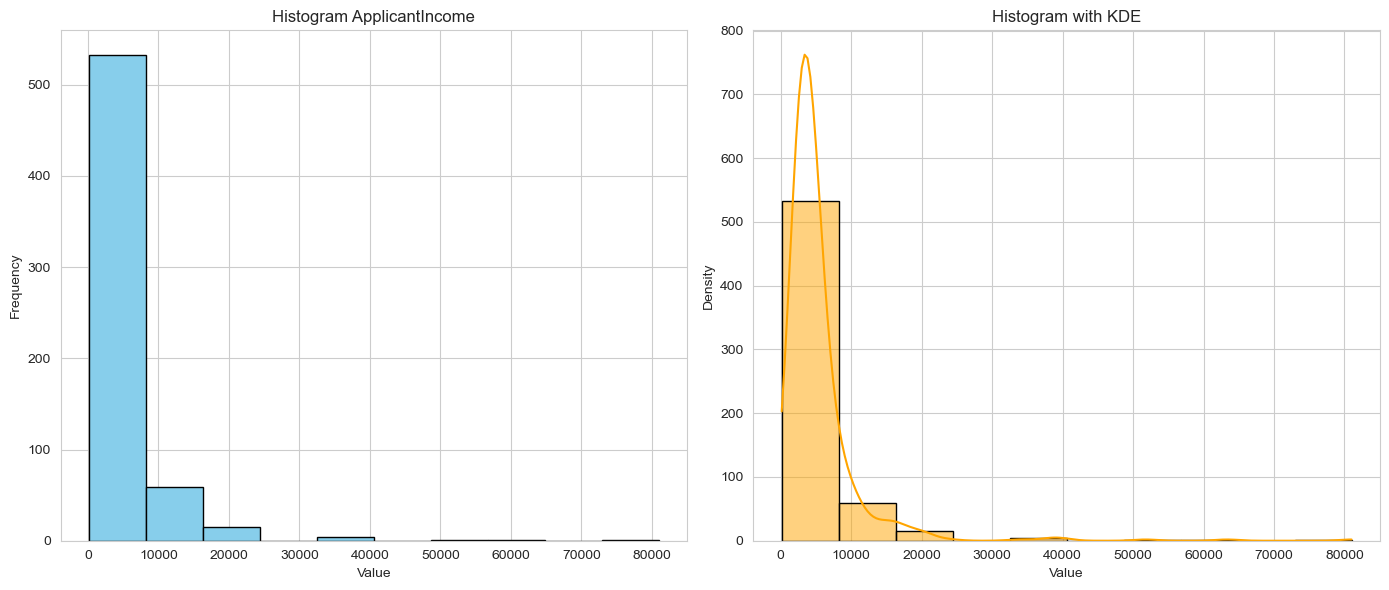

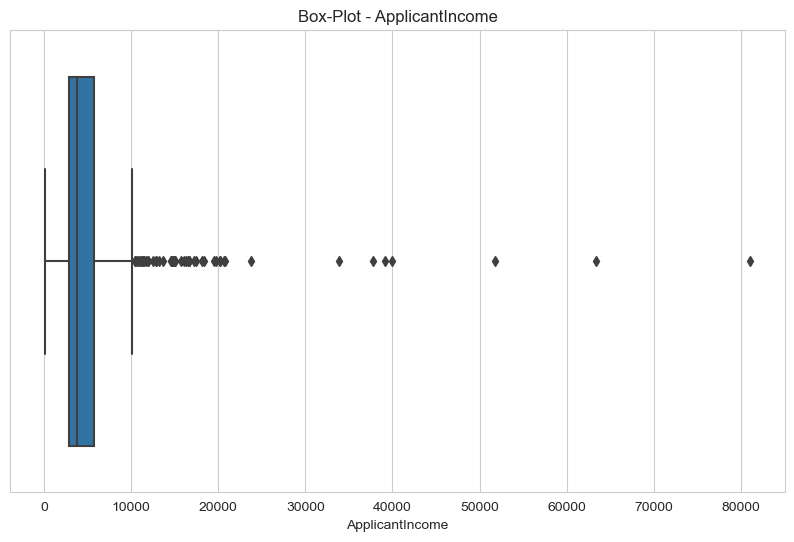

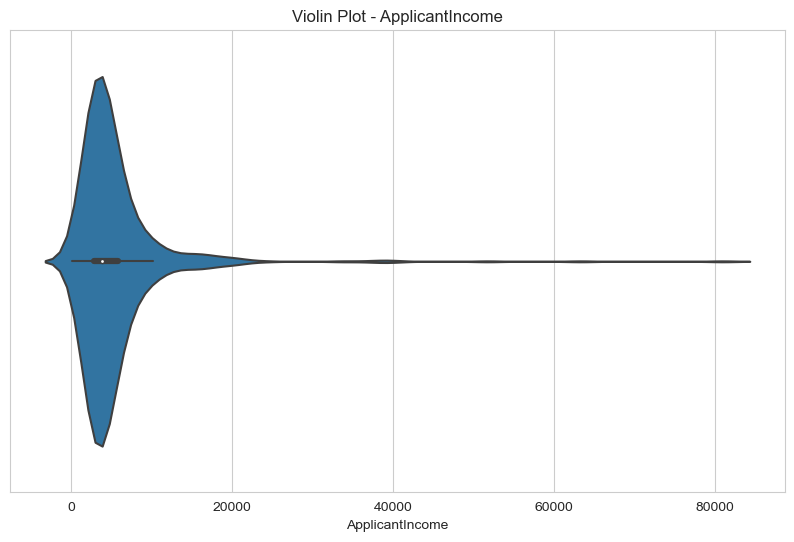

CoapplicantIncome bins [0, 4167, 8334, 12501, 16668, 20835, 25002, 29169, 33336, 37503]
Frequency Distribution Table for CoapplicantIncome:
+---+----------------+-----------+
|   |    Interval    | Frequency |
+---+----------------+-----------+
| 0 |   (0, 4167]    |    290    |
| 1 |  (4167, 8334]  |    44     |
| 2 | (8334, 12501]  |     3     |
| 3 | (12501, 16668] |     0     |
| 4 | (16668, 20835] |     2     |
| 5 | (20835, 25002] |     0     |
| 6 | (25002, 29169] |     0     |
| 7 | (29169, 33336] |     0     |
| 8 | (33336, 37503] |     1     |
+---+----------------+-----------+
Relative Frequency Distribution Table for CoapplicantIncome:
+---+----------------+-----------+----------------------+
|   |    Interval    | Frequency | Relative Frequency % |
+---+----------------+-----------+----------------------+
| 0 |   (0, 4167]    |    290    |        85.29         |
| 1 |  (4167, 8334]  |    44     |        12.94         |
| 2 | (8334, 12501]  |     3     |         0.88       

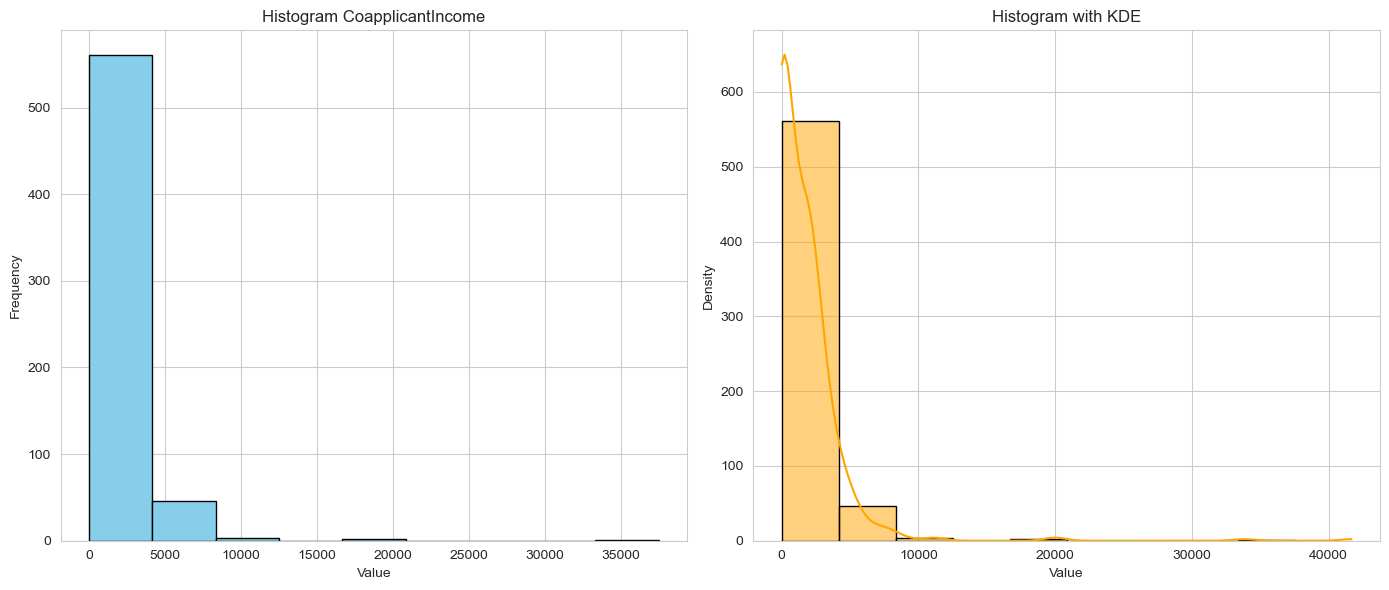

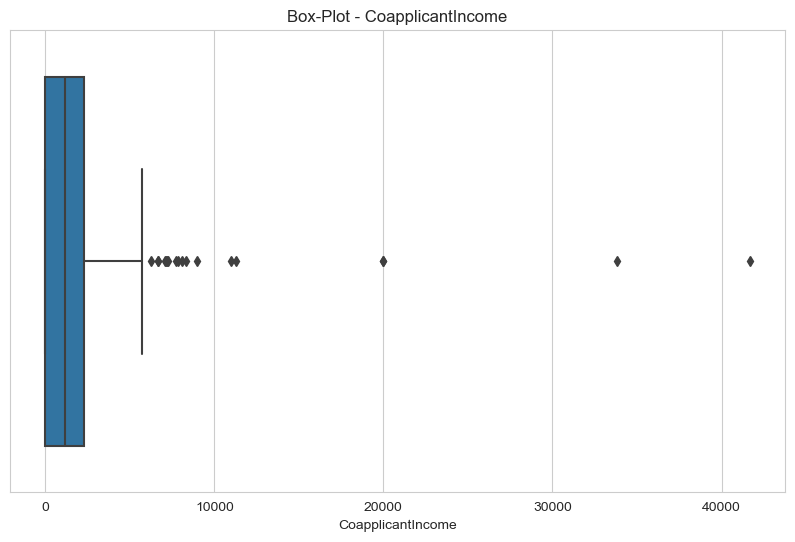

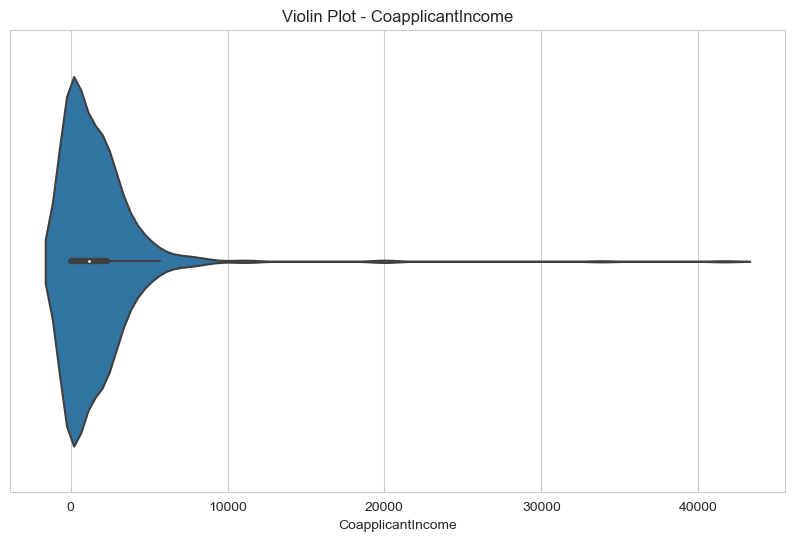

LoanAmount bins [9, 78, 147, 216, 285, 354, 423, 492, 561, 630, 699]
Frequency Distribution Table for LoanAmount:
+---+------------+-----------+
|   |  Interval  | Frequency |
+---+------------+-----------+
| 0 |  (9, 78]   |    71     |
| 1 | (78, 147]  |    332    |
| 2 | (147, 216] |    143    |
| 3 | (216, 285] |    33     |
| 4 | (285, 354] |    15     |
| 5 | (354, 423] |     6     |
| 6 | (423, 492] |     5     |
| 7 | (492, 561] |     3     |
| 8 | (561, 630] |     3     |
| 9 | (630, 699] |     1     |
+---+------------+-----------+
Relative Frequency Distribution Table for LoanAmount:
+---+------------+-----------+----------------------+
|   |  Interval  | Frequency | Relative Frequency % |
+---+------------+-----------+----------------------+
| 0 |  (9, 78]   |    71     |         11.6         |
| 1 | (78, 147]  |    332    |        54.25         |
| 2 | (147, 216] |    143    |        23.37         |
| 3 | (216, 285] |    33     |         5.39         |
| 4 | (285, 354] |  

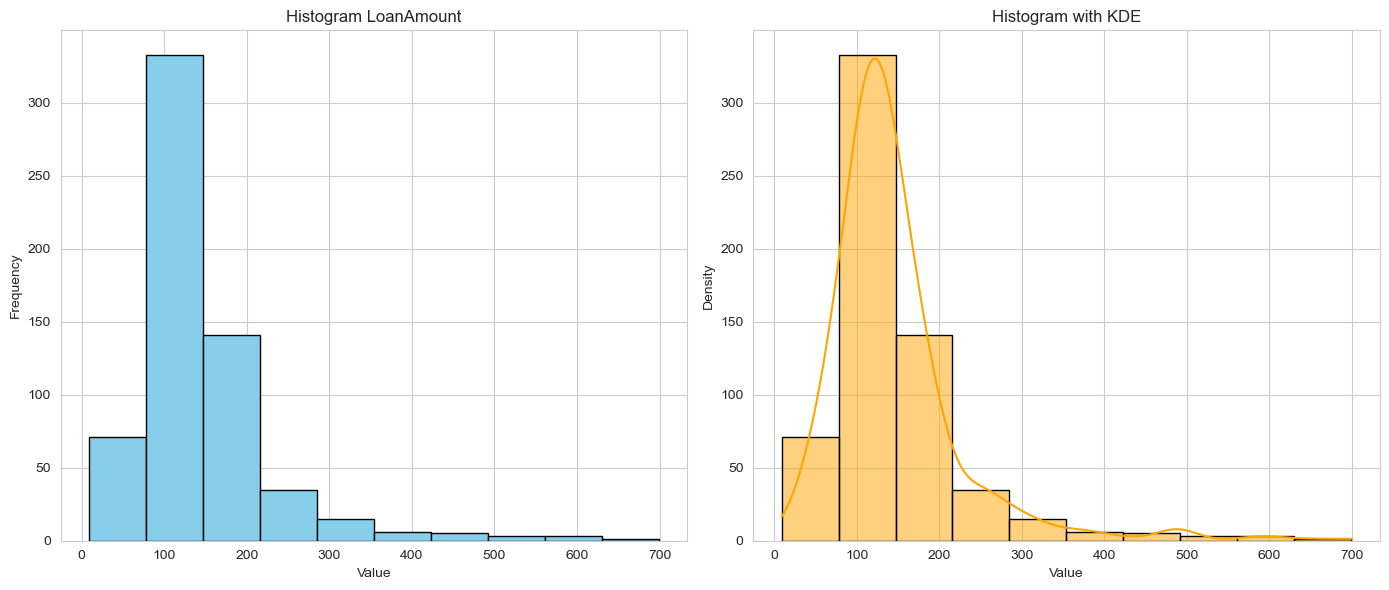

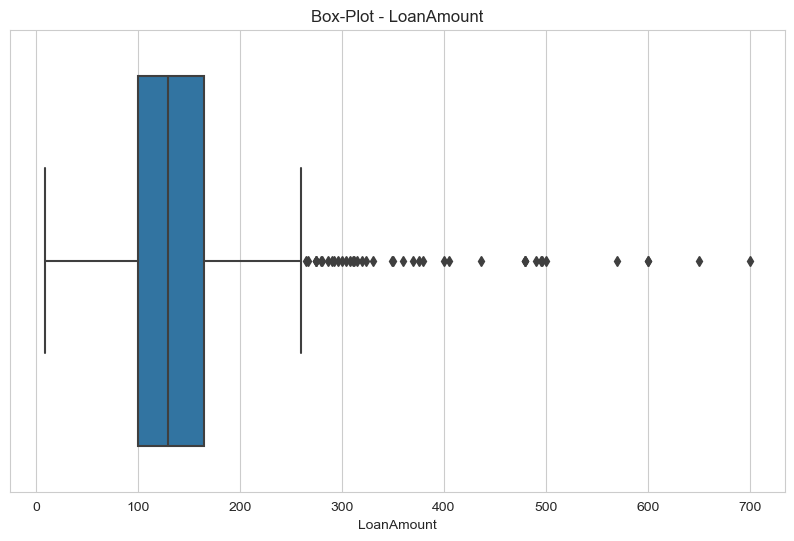

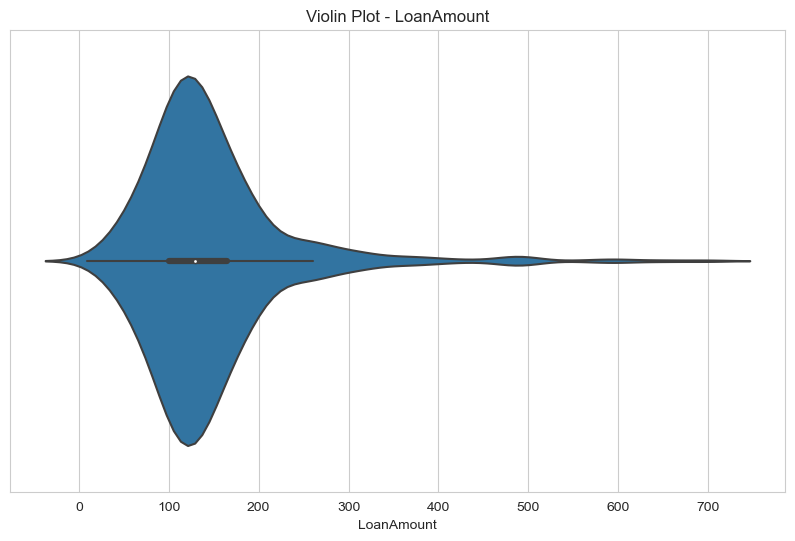

Loan_Amount_Term bins [12, 59, 106, 153, 200, 247, 294, 341, 388, 435]
Frequency Distribution Table for Loan_Amount_Term:
+---+------------+-----------+
|   |  Interval  | Frequency |
+---+------------+-----------+
| 0 |  (12, 59]  |     2     |
| 1 | (59, 106]  |     6     |
| 2 | (106, 153] |     3     |
| 3 | (153, 200] |    44     |
| 4 | (200, 247] |     4     |
| 5 | (247, 294] |     0     |
| 6 | (294, 341] |    13     |
| 7 | (341, 388] |    526    |
| 8 | (388, 435] |     0     |
+---+------------+-----------+
Relative Frequency Distribution Table for Loan_Amount_Term:
+---+------------+-----------+----------------------+
|   |  Interval  | Frequency | Relative Frequency % |
+---+------------+-----------+----------------------+
| 0 |  (12, 59]  |     2     |         0.33         |
| 1 | (59, 106]  |     6     |         1.0          |
| 2 | (106, 153] |     3     |         0.5          |
| 3 | (153, 200] |    44     |         7.36         |
| 4 | (200, 247] |     4     |       

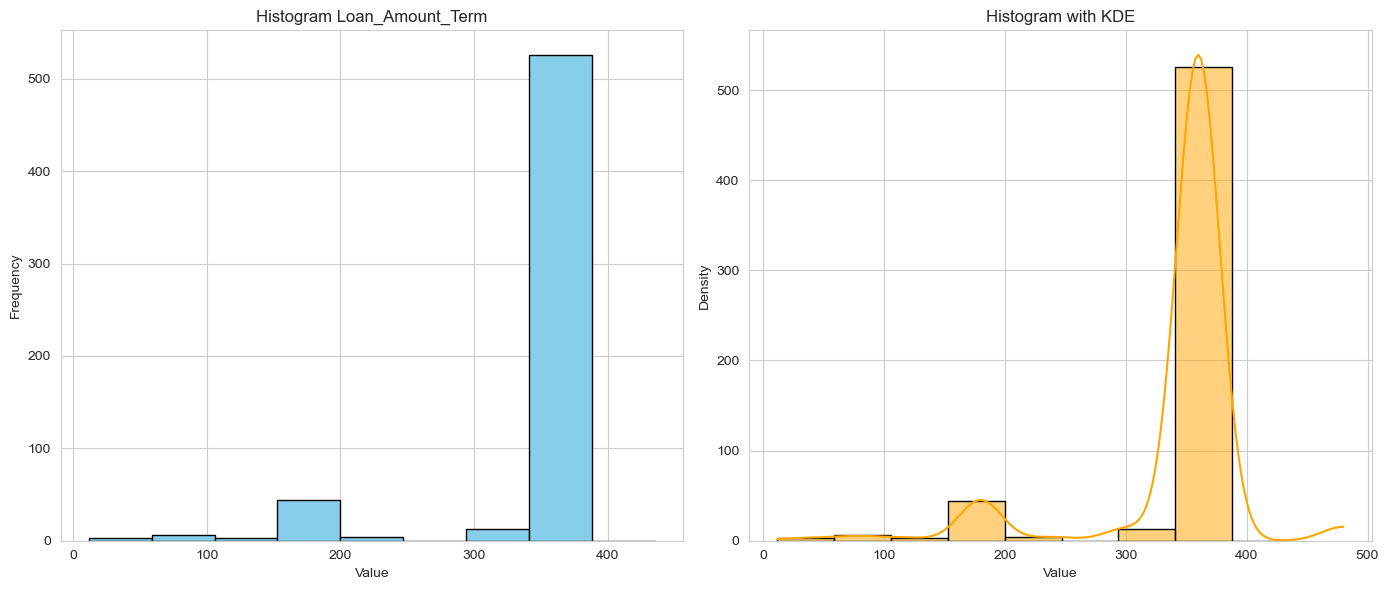

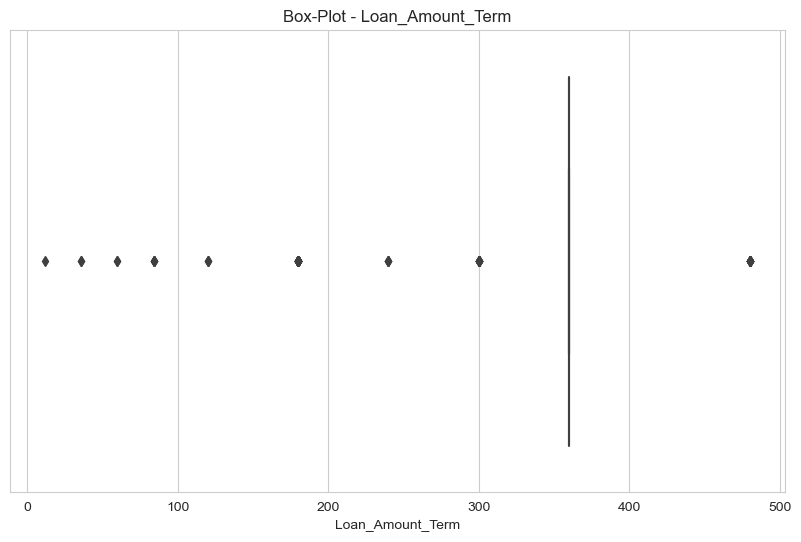

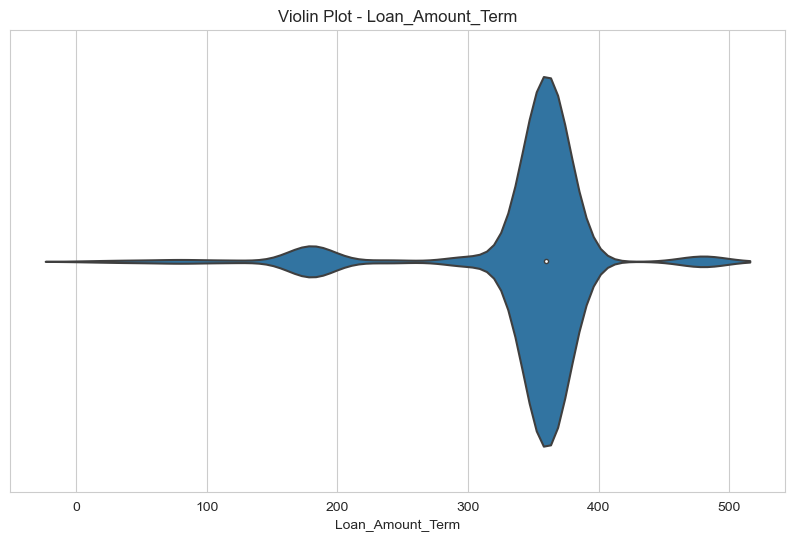

In [221]:

pipeline_num_var = Pipeline([
    ('num_uni_variate_analysis', HistBoxChartTransformer())
])

loan_num_df = loan_df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(loan_num_df)

# 8. Numerical - Variables -Outliers Analysis

In [222]:
def find_outliers_fill_with_median(con_var):
    """find outliers and remove the outliers from the dataset for given var - feature"""
    print(f"outliers filling for {con_var}")
    q1 = loan_df[con_var].quantile(0.25)
    q3 = loan_df[con_var].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (1.5*iqr)
    higher_fence = q3 + (1.5*iqr)

    cond1 = loan_df[con_var] < lower_fence
    cond2 = loan_df[con_var] > higher_fence

    
    con = cond1 |  cond2
    val = loan_df[con_var].median()
    loan_df[con_var]=np.where(con, val,loan_df[con_var])
    plt.boxplot(loan_df[con_var])
    plt.show()

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')
outliers filling for ApplicantIncome


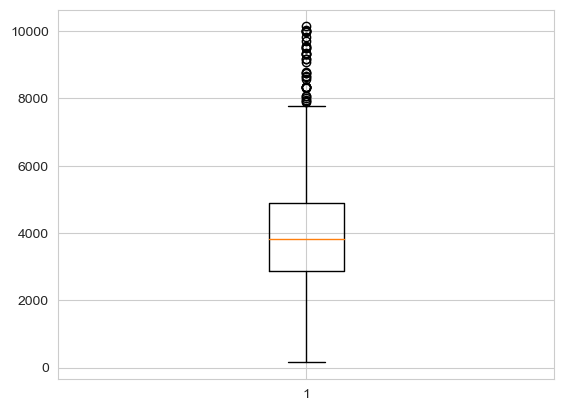

outliers filling for CoapplicantIncome


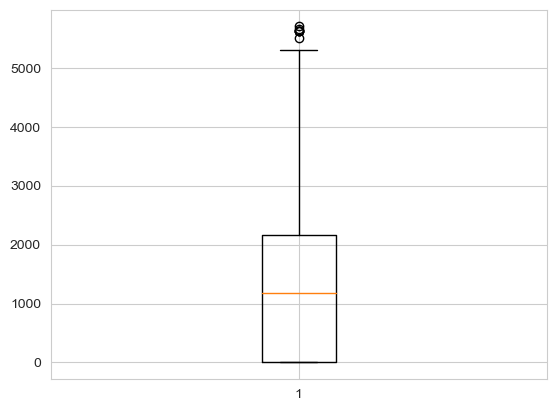

outliers filling for LoanAmount


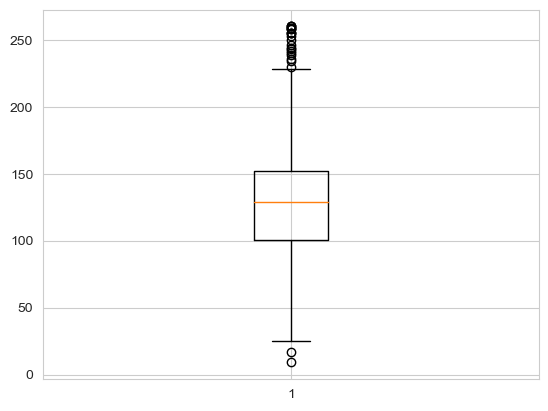

In [223]:
loan_num_df = loan_df[["ApplicantIncome","CoapplicantIncome","LoanAmount"]].copy()
con_vars = loan_num_df.select_dtypes(exclude="object").columns
print(con_vars)
for var in con_vars:
    find_outliers_fill_with_median(var)
    print("========================================================")

# 9. Bi Variate Analysis

###  9.1 Cat Vs Cat

In [224]:
cat_vars = loan_df.select_dtypes(include="object").columns
print(cat_vars)
cat_vars = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


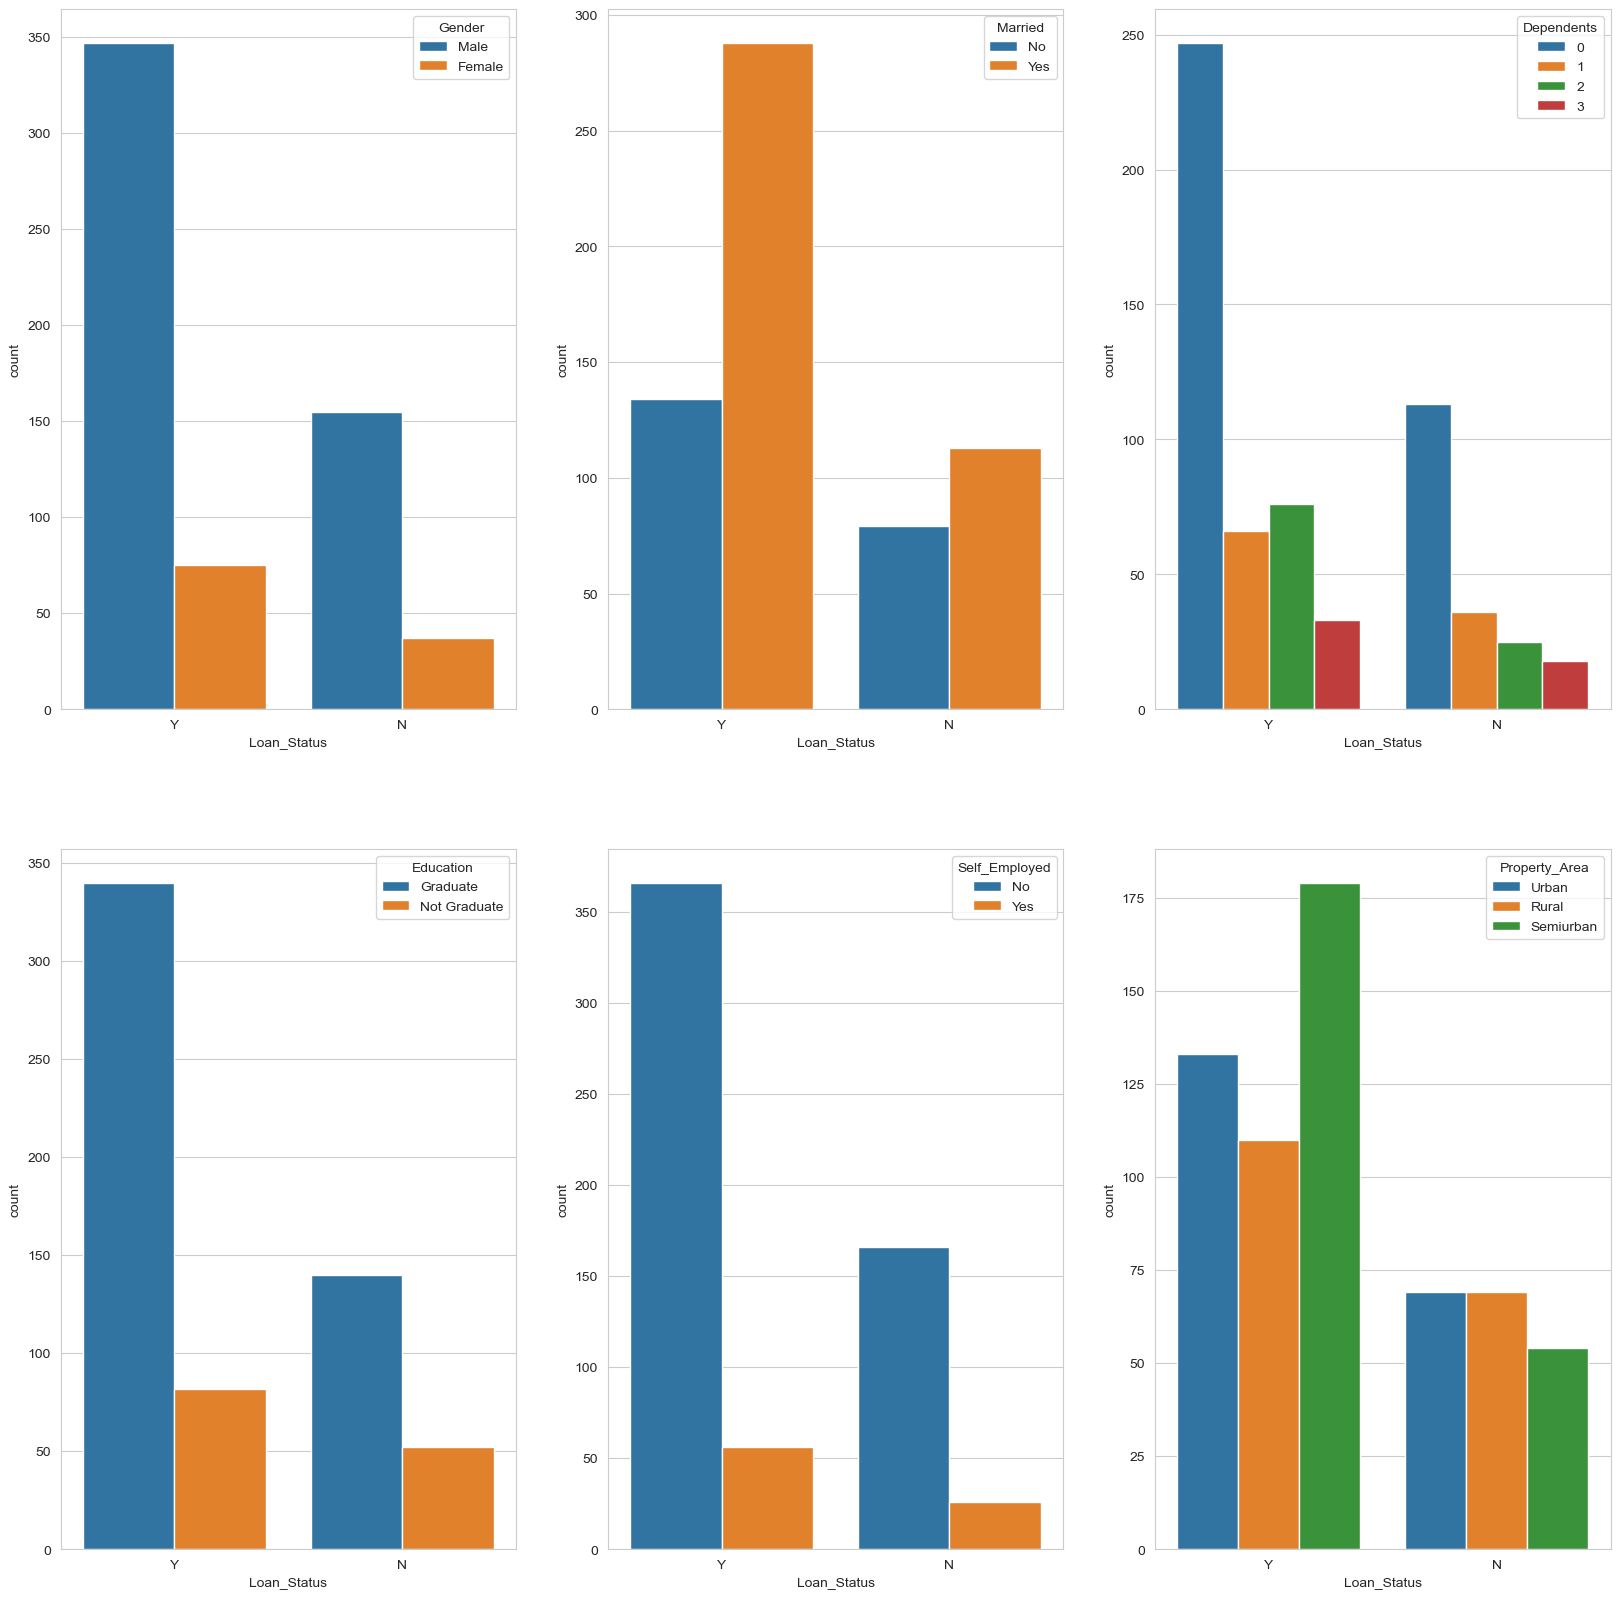

In [225]:
## Cat Vs Cat
fig,ax = plt.subplots(2,3,figsize=(20,20))
for axi,x in zip(ax.flat,cat_vars):
    sns.countplot(x=loan_df.Loan_Status,hue=loan_df[x],ax=axi)

### 9.2 Cat Vs Num

In [226]:
## Cat Vs Num
loan_df.select_dtypes(exclude="object").columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [227]:
output_var='Loan_Status'

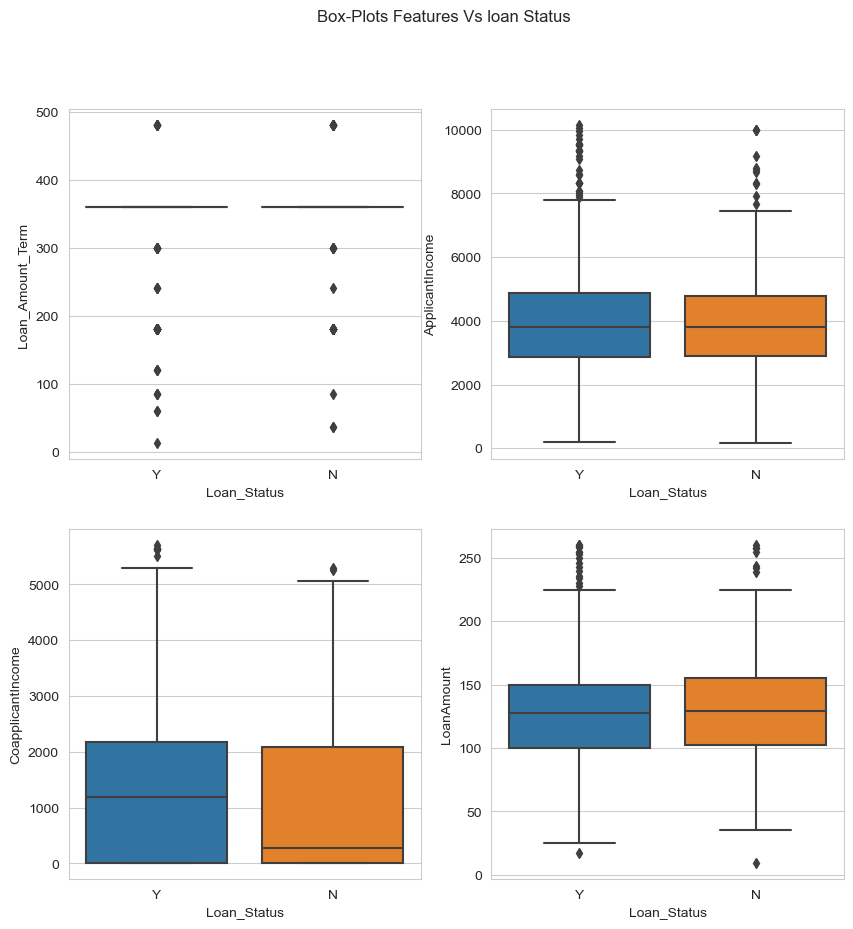

In [228]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Box-Plots Features Vs loan Status')
sns.boxplot(ax=axes[0, 0], x=output_var, y='Loan_Amount_Term', data=loan_df)
sns.boxplot(ax=axes[0, 1], x=output_var, y='ApplicantIncome', data=loan_df)
sns.boxplot(ax=axes[1, 0], x=output_var, y='CoapplicantIncome', data=loan_df)
sns.boxplot(ax=axes[1, 1], x=output_var, y='LoanAmount', data=loan_df)
plt.show()

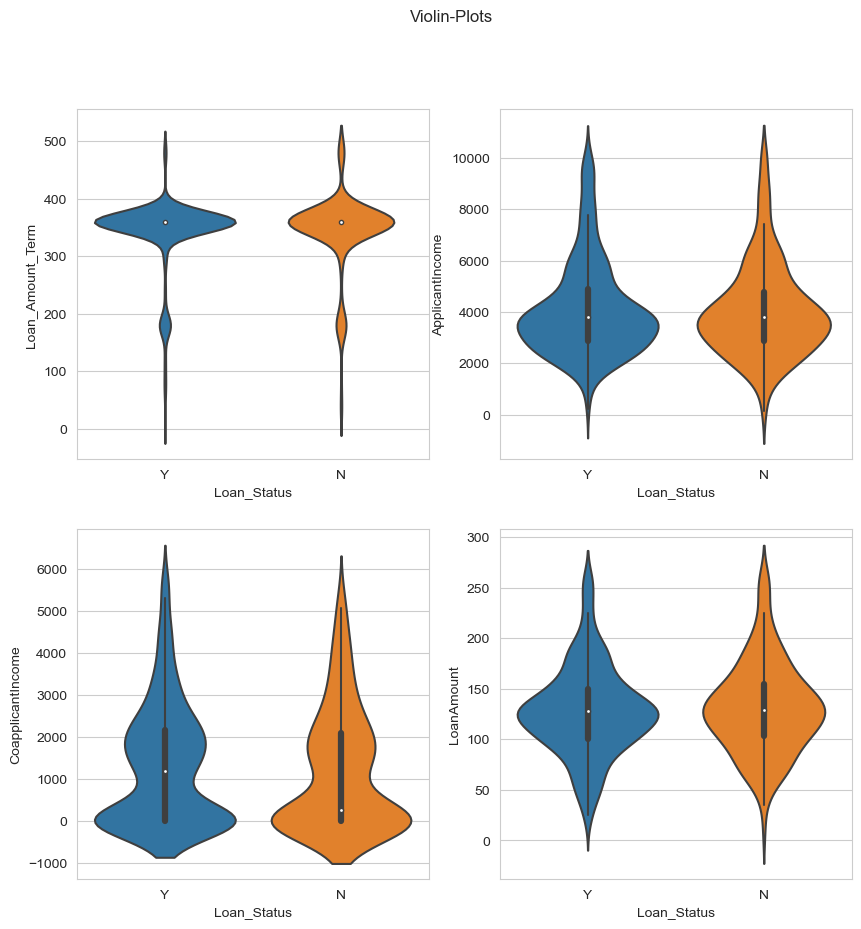

In [229]:

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Violin-Plots')
sns.violinplot(ax=axes[0, 0], x=output_var, y='Loan_Amount_Term', data=loan_df)
sns.violinplot(ax=axes[0, 1], x=output_var, y='ApplicantIncome', data=loan_df)
sns.violinplot(ax=axes[1, 0], x=output_var, y='CoapplicantIncome', data=loan_df)
sns.violinplot(ax=axes[1, 1], x=output_var, y='LoanAmount', data=loan_df)
plt.show()

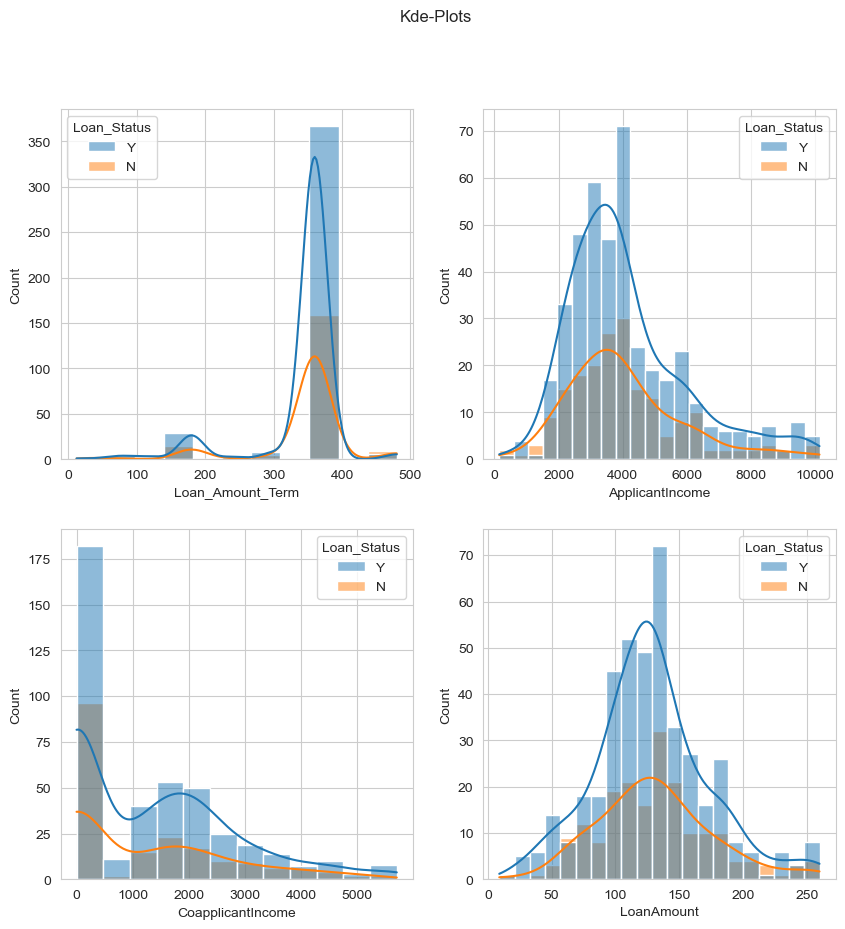

In [230]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Kde-Plots')
sns.histplot(ax=axes[0, 0], hue=output_var, x='Loan_Amount_Term', data=loan_df,kde=True)
sns.histplot(ax=axes[0, 1], hue=output_var, x='ApplicantIncome', data=loan_df,kde=True)
sns.histplot(ax=axes[1, 0], hue=output_var, x='CoapplicantIncome', data=loan_df,kde=True)
sns.histplot(ax=axes[1, 1], hue=output_var, x='LoanAmount', data=loan_df,kde=True)
plt.show()

## 9.3 Num Vs Num

In [231]:
loan_df.select_dtypes(exclude="object").columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

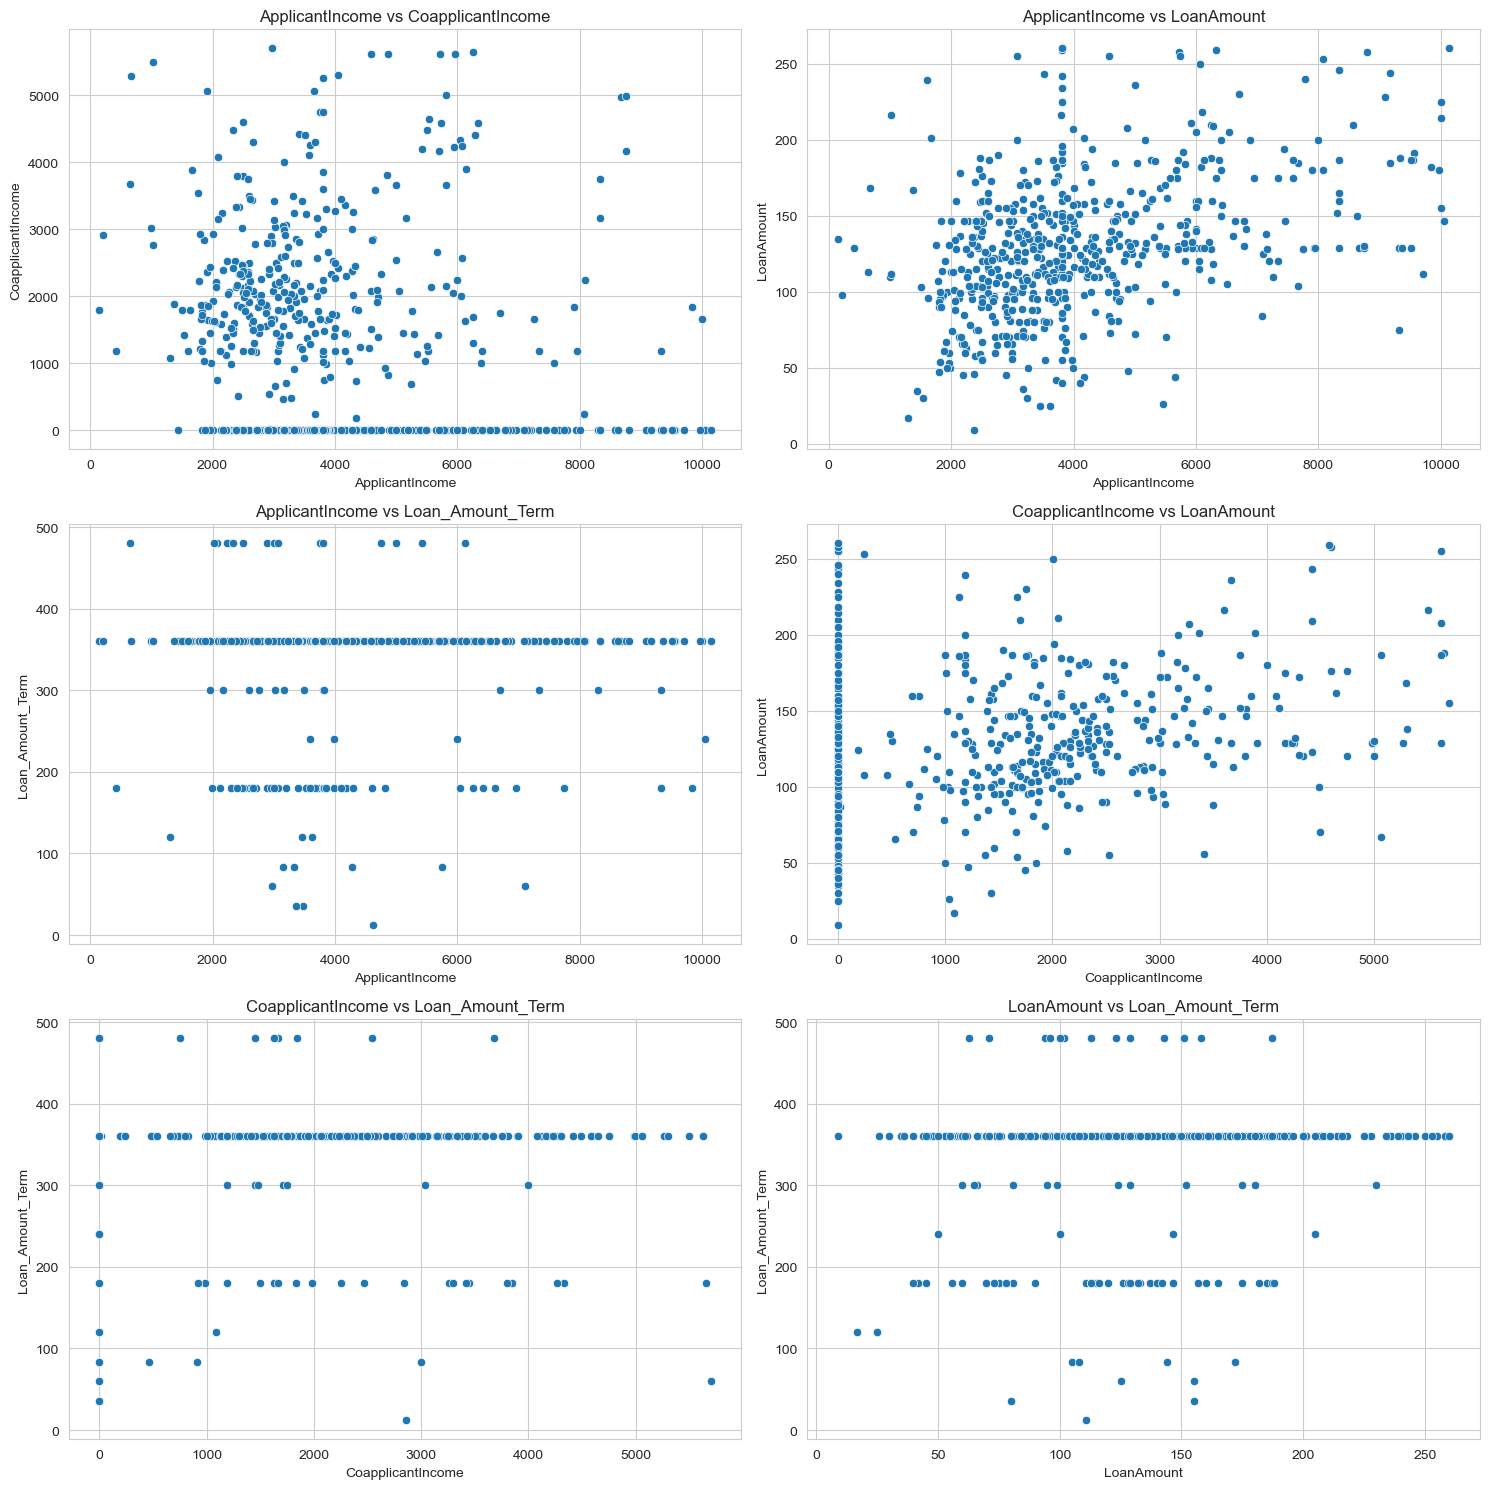

In [232]:

# Selecting only numerical columns
numerical_columns = loan_df.select_dtypes(exclude="object").columns

# Creating unique scatter plots
num_cols_count = len(numerical_columns)
num_plots = num_cols_count * (num_cols_count - 1) // 2

# Setting up subplots
fig, axes = plt.subplots(num_plots // 2, 2, figsize=(15, 15))

plot_index = 0
for i in range(num_cols_count):
    for j in range(i+1, num_cols_count):
        row = plot_index // 2
        col = plot_index % 2

        # Scatter plot
        sns.scatterplot(x=numerical_columns[i], y=numerical_columns[j], data=loan_df, ax=axes[row, col])
        axes[row, col].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')

        plot_index += 1

plt.tight_layout()
plt.show()

### 9.4 Correaltion Numerical Columns

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.198660    0.409769   
CoapplicantIncome        -0.198660           1.000000    0.217976   
LoanAmount                0.409769           0.217976    1.000000   
Loan_Amount_Term         -0.035532          -0.005549    0.077932   

                   Loan_Amount_Term  
ApplicantIncome           -0.035532  
CoapplicantIncome         -0.005549  
LoanAmount                 0.077932  
Loan_Amount_Term           1.000000  


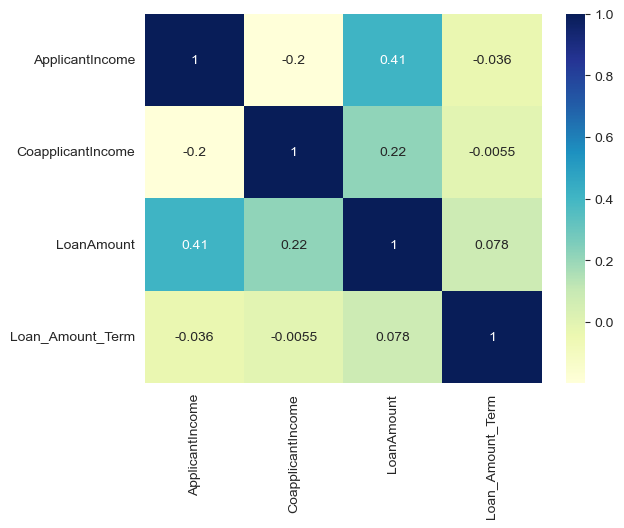

In [233]:
print(loan_df.corr(numeric_only=True))
sns.heatmap(loan_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

# 10. Data Transformation

In [234]:
 num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [235]:
def normal_transformations(var):
    var_data = np.sqrt(loan_df[var])
    plt.figure(figsize=(10,5))
    plt.subplot(2,2,1)
    plt.hist(var_data,bins=40,label=f"{var}-data")
    plt.legend()
    
    plt.subplot(2,2,2)
    plt.hist(loan_df[var],bins=40,label="data")
    plt.legend()
    
    plt.subplot(2,2,3)
    plt.boxplot(var_data)
    plt.subplot(2,2,4)
    plt.boxplot(loan_df[var])
    plt.show()
    loan_df[var]=var_data
    
    plt.show()

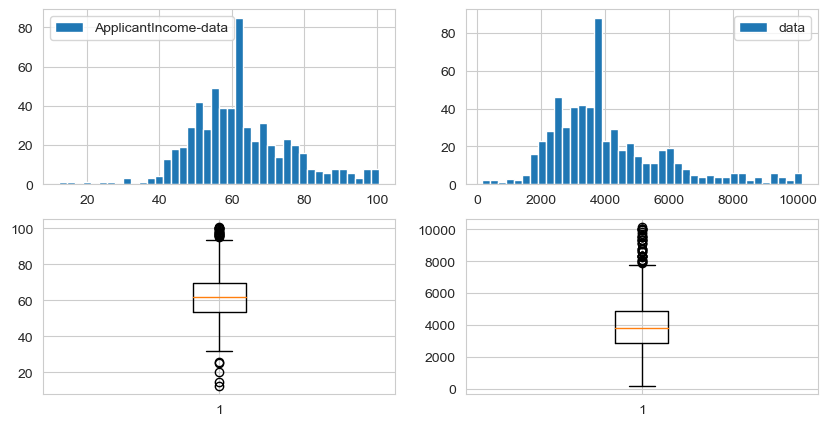

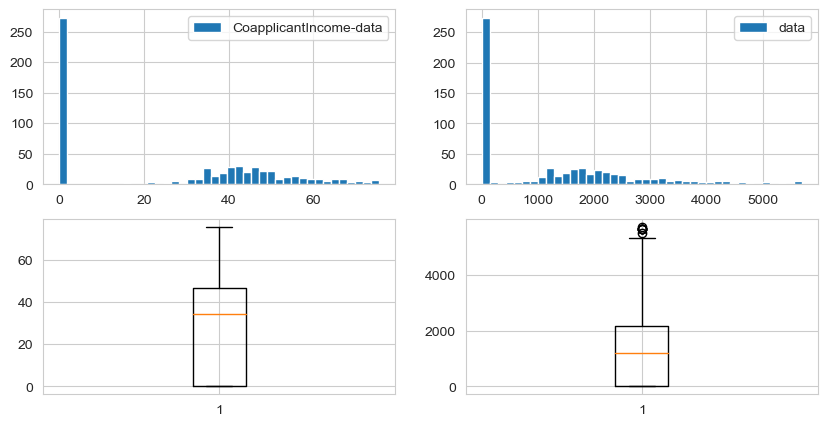

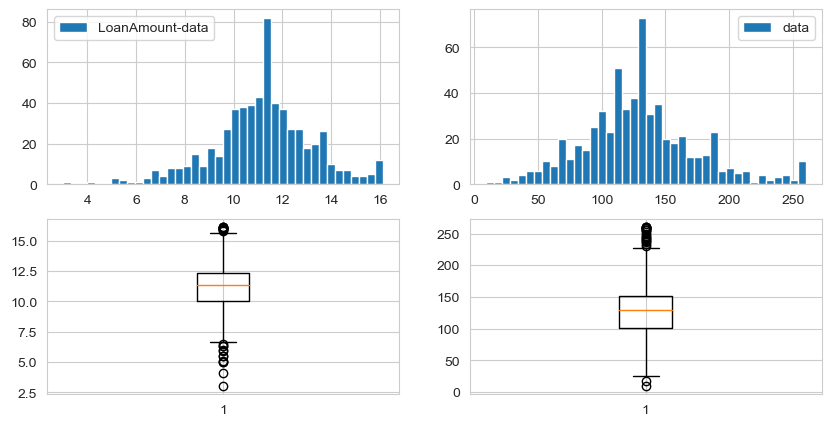

In [236]:
for i in num_cols:
    normal_transformations(i)

# 12. Convert Cat - to - Numerical Columns

In [237]:
le = LabelEncoder()
loan_df["Loan_Status"]=le.fit_transform(loan_df["Loan_Status"])

In [238]:
Y=loan_df["Loan_Status"]
X=loan_df[[ 'Married',  'Education','Property_Area','Credit_History']]
X=pd.get_dummies(X,dtype='int',drop_first=True)

In [239]:
X, Y = SMOTE().fit_resample(X, Y)

In [240]:
X

,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Credit_History_Y
0,0,0,0,1,1
1,1,0,0,0,1
2,1,0,0,1,1
3,1,1,0,1,1
4,0,0,0,1,1
...,...,...,...,...,...
839,1,0,0,0,1
840,0,0,0,1,0
841,1,1,1,0,0
842,1,1,0,1,0


# ML Models

In [241]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

## Logistic Regression 

In [242]:
lg_model = LogisticRegression(solver='saga', max_iter=500, random_state=42)
lg_model.fit(X_train, Y_train)
score = lg_model.score(X_train, Y_train)
print("Model - Logistic Regression")
print('accuracy train score overall :', score)

score = lg_model.score(X_test, Y_test)
print('accuracy test score overall :', score)
y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

Model - Logistic Regression
accuracy train score overall : 0.7185185185185186
accuracy test score overall : 0.6804733727810651
              precision    recall  f1-score   support

           0       0.86      0.51      0.64        94
           1       0.59      0.89      0.71        75

    accuracy                           0.68       169
   macro avg       0.73      0.70      0.68       169
weighted avg       0.74      0.68      0.67       169

[[48 46]
 [ 8 67]]


## GaussianNB

In [243]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
gnb_model = GaussianNB()
gnb_model.fit(X_train,Y_train)
print("Model-GaussianNB")
print("train score",gnb_model.score(X_train,Y_train))
print("test score",gnb_model.score(X_test,Y_test))

Model-GaussianNB
train score 0.7229629629629629
test score 0.6745562130177515


In [244]:
cnb_model = CategoricalNB()
cnb_model.fit(X_train,Y_train)
print("Model- CategoricalNB")
print("train score",cnb_model.score(X_train,Y_train))
print("test score",cnb_model.score(X_test,Y_test))

Model- CategoricalNB
train score 0.7244444444444444
test score 0.6804733727810651


# Suport Vector Machine - Classifier

In [245]:
from sklearn.svm import SVC
# Initialize the SVM classifier
svm_linear_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_linear_classifier.fit(X_train, Y_train)

# Predict the classes for test set
y_pred = svm_linear_classifier.predict(X_test)

print("model-Suport Vector Machine - Classifier")
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

model-Suport Vector Machine - Classifier
Accuracy: 0.6745562130177515


In [246]:
svm_rbf_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm_rbf_classifier.fit(X_train, Y_train)

# Predict the classes for test set
y_pred = svm_rbf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6923076923076923


In [247]:
svm_poly_classifier = SVC(kernel='poly', random_state=42)

# Train the SVM classifier
svm_poly_classifier.fit(X_train, Y_train)

# Predict the classes for test set
y_pred = svm_poly_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6923076923076923


In [248]:
svm_sigmoid_classifier = SVC(kernel='sigmoid', random_state=42)

# Train the SVM classifier
svm_sigmoid_classifier.fit(X_train, Y_train)

# Predict the classes for test set
y_pred = svm_sigmoid_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.39644970414201186


## Decision Tree

In [249]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=20,random_state=42)
dt_clf.fit(X_train, Y_train)
print("Model-Decion Tree")
accuracy=dt_clf.score(X_train, Y_train)
print(f"train score: {accuracy}")

accuracy=dt_clf.score(X_test, Y_test)
print(f"test score: {accuracy}")

Model-Decion Tree
train score: 0.7348148148148148
test score: 0.727810650887574


## Radom Forest

In [250]:
rf_clf= RandomForestClassifier(n_estimators = 1000, random_state = 42, max_leaf_nodes=20)
rf_clf.fit(X_train, Y_train)
accuracy=rf_clf.score(X_train, Y_train)
print(f"train score: {accuracy}")
accuracy=rf_clf.score(X_test, Y_test)
print(f"test score: {accuracy}")

train score: 0.7348148148148148
test score: 0.727810650887574


## AdaBoost 

In [251]:

base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_clf = AdaBoostClassifier( n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_clf.fit(X_train, Y_train)

print("Model-AdaBoost")
print("train score",adaboost_clf.score(X_train, Y_train))

# Predict on the test set
y_pred = adaboost_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"test score: {accuracy}")

Model-AdaBoost
train score 0.7185185185185186
test score: 0.6804733727810651


C:\Users\91956\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## GradientBoostingClassifier

In [252]:
gdb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=1, random_state=42)
gdb_clf.fit(X_train, Y_train)
print("model-GradientBoostingClassifier")
accuracy = gdb_clf.score(X_test, Y_test)
print("Accuracy:", accuracy)

model-GradientBoostingClassifier
Accuracy: 0.6745562130177515


## XGBClassifier

In [253]:
from xgboost import XGBClassifier
xgmodel = XGBClassifier()
xgmodel.fit(X_train, Y_train)
# Make predictions on the test set
y_pred = xgmodel.predict(X_test)

print("model-XGBClassifier")
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

model-XGBClassifier
Accuracy: 0.727810650887574


# Test the file - Submission

In [254]:
file_path=r"test_data.csv"
loan_test_df=pd.read_csv(file_path)
loan_test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [255]:
loan_test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [256]:
loan_test_df["Credit_History"].fillna(0,inplace=True)

In [257]:
loan_test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History        0
Property_Area         0
dtype: int64

In [258]:
loan_test_df["Credit_History"]=loan_test_df["Credit_History"].map(lambda x: 'N' if x==0 else 'Y')


# Logistic

In [259]:
X_test = loan_test_df[[ 'Married',  'Education','Property_Area','Credit_History']]
X_test=pd.get_dummies(X_test,dtype='int',drop_first=True)
X_test

,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Credit_History_Y
0,1,0,0,1,1
1,1,0,0,1,1
2,1,0,0,1,1
3,1,0,0,1,0
4,0,1,0,1,1
...,...,...,...,...,...
362,1,1,0,1,1
363,1,0,0,1,1
364,0,0,1,0,0
365,1,0,0,0,1


In [260]:

# Predict on the test set

y_pred = lg_model.predict(X_test)

result = pd.DataFrame()
result["Loan_ID"]=loan_test_df["Loan_ID"]
result["Loan_Status"]=y_pred
result["Loan_Status"]=result["Loan_Status"].map(lambda x: 'N' if x==0 else 'Y')
result.to_csv("sample_submission_loan_predection_logistic.csv",index=False)

# adaboost

In [261]:
# Predict on the test set
y_pred = adaboost_clf.predict(X_test)
result = pd.DataFrame()
result["Loan_ID"]=loan_test_df["Loan_ID"]
result["Loan_Status"]=y_pred
result["Loan_Status"]=result["Loan_Status"].map(lambda x: 'N' if x==0 else 'Y')
result.to_csv("sample_submission_loan_predection_adaboost.csv",index=False)


# GausianNB

In [262]:


y_pred = gnb_model.predict(X_test)
len(y_pred)

result = pd.DataFrame()
result["Loan_ID"]=loan_test_df["Loan_ID"]
result["Loan_Status"]=y_pred
result["Loan_Status"]=result["Loan_Status"].map(lambda x: 'N' if x==0 else 'Y')
result.to_csv("sample_submission_loan_predection_gaussiannb.csv",index=False)

In [263]:
y_pred = cnb_model.predict(X_test)
len(y_pred)

result = pd.DataFrame()
result["Loan_ID"]=loan_test_df["Loan_ID"]
result["Loan_Status"]=y_pred
result["Loan_Status"]=result["Loan_Status"].map(lambda x: 'N' if x==0 else 'Y')
result.to_csv("sample_submission_loan_predection_cnb.csv",index=False)

# GBC

In [264]:

y_pred = gdb_clf.predict(X_test)
len(y_pred)

result = pd.DataFrame()
result["Loan_ID"]=loan_test_df["Loan_ID"]
result["Loan_Status"]=y_pred
result["Loan_Status"]=result["Loan_Status"].map(lambda x: 'N' if x==0 else 'Y')
result.to_csv("sample_submission_loan_predection_gradientclassifier.csv",index=False)

# svc

In [265]:
y_pred = svm_linear_classifier.predict(X_test)
len(y_pred)

result = pd.DataFrame()
result["Loan_ID"]=loan_test_df["Loan_ID"]
result["Loan_Status"]=y_pred
result["Loan_Status"]=result["Loan_Status"].map(lambda x: 'N' if x==0 else 'Y')
result.to_csv("sample_submission_loan_predection_svc.csv",index=False)

# xgboost

In [266]:

y_pred = xgmodel.predict(X_test)
len(y_pred)

result = pd.DataFrame()
result["Loan_ID"]=loan_test_df["Loan_ID"]
result["Loan_Status"]=y_pred
result["Loan_Status"]=result["Loan_Status"].map(lambda x: 'N' if x==0 else 'Y')
result.to_csv("sample_submission_loan_predection_xgmodel.csv",index=False)

# DT

In [267]:

y_pred = dt_clf.predict(X_test)
len(y_pred)

result = pd.DataFrame()
result["Loan_ID"]=loan_test_df["Loan_ID"]
result["Loan_Status"]=y_pred
result["Loan_Status"]=result["Loan_Status"].map(lambda x: 'N' if x==0 else 'Y')
result.to_csv("sample_submission_loan_predection_dtmodel.csv",index=False)

# Random Forest

In [268]:
y_pred = rf_clf.predict(X_test)
len(y_pred)

result = pd.DataFrame()
result["Loan_ID"]=loan_test_df["Loan_ID"]
result["Loan_Status"]=y_pred
result["Loan_Status"]=result["Loan_Status"].map(lambda x: 'N' if x==0 else 'Y')
result.to_csv("sample_submission_loan_predection_radomforest_model.csv",index=False)